In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

## Read Data and Analysis Data

In [2]:
df = pd.read_csv(
    "Supermarket Customers.csv",
    encoding="windows-1252",
    )
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Setelah pengecekan dapat dikatakan bahwa ada satu data yang typenya abnormal yaitu "DT_Customer" yang seharusnya memiliki type "datetime".

In [4]:
test_variable = pd.to_datetime(df["Dt_Customer"], format="mixed")
print(test_variable)

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]


In [5]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="mixed")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [7]:
df.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

Setelah pemeriksaan, dapat dilihat bahwa ada missing values pada data "Income" sebanyak 24 data. Karena data yang hilang tidak terlalu banyak dan data yang hilang itu adalah data Income, maka cara penyelesaian yang menurut saya paling efektif adalah dengan cara mengganti data yang hilang tersebut dengan nilai median dari data yang ada.

In [8]:
df["Income"] = df["Income"].replace(np.NaN, df["Income"].median())
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2240
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
print(df[["Z_CostContact", "Z_Revenue"]].value_counts(dropna=False))

Z_CostContact  Z_Revenue
3              11           2240
Name: count, dtype: int64


Disini terlihat kolom "Z_CostContact" dan "Z_Revenue" memiliki isi yang konstant. Maka dari itu kolom ID, Z_CostContact, dan Z_Revenue akan dihapus agar data semakin lean.

In [12]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


Pembuatan kolom data baru, yaitu data "Age" untuk mendapatkan umur customer, "Customer Since Years" untuk mengukur loyalty customer, dan "Children" untuk mendapatkan jumlah anak yang dimiliki customer, yang dapat membantu pemrosesan data yang nanti akan dilakukan.

In [14]:
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df['Customer_Since_Years'] = current_year - df['Dt_Customer'].dt.year
df['Children'] = df['Kidhome'] + df['Teenhome']

df[['Year_Birth', 'Age', 'Dt_Customer', 'Customer_Since_Years', 'Children']].head()

,Year_Birth,Age,Dt_Customer,Customer_Since_Years,Children
0,1957,68,2012-04-09,13,0
1,1954,71,2014-08-03,11,2
2,1965,60,2013-08-21,12,0
3,1984,41,2014-10-02,11,1
4,1981,44,2014-01-19,11,1


Juga membuat kolom baru yang berisi total dari keseluruhan barang yang dijual didalam supermarket.

In [15]:
pengeluaran = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
df['Total_Spent'] = df[pengeluaran].sum(axis=1)

In [16]:
df[['Year_Birth', 'Age', 'Dt_Customer', 'Customer_Since_Years', 'Children', 'Total_Spent']].head()

,Year_Birth,Age,Dt_Customer,Customer_Since_Years,Children,Total_Spent
0,1957,68,2012-04-09,13,0,1617
1,1954,71,2014-08-03,11,2,27
2,1965,60,2013-08-21,12,0,776
3,1984,41,2014-10-02,11,1,53
4,1981,44,2014-01-19,11,1,422


Setelah melengkapi seluruh data, maka proses bisa dilanjutkan ke pemeriksaan outlier dan jenis distribusi data.

In [17]:
print(df['Marital_Status'].value_counts(dropna=False))

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Didapatkan adanya beberapa data yang tidak relevan didalam "Marital Status". Maka dari itu, data yang tidak relevan tersebut harus dihapus agar data bisa menjadi lebih reliable.

In [18]:
Outlier_Marital_Status = ["Absurd", "YOLO", "Alone"]
df = df[~df['Marital_Status'].isin(Outlier_Marital_Status)]

In [19]:
print(df['Marital_Status'].value_counts(dropna=False))

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: count, dtype: int64


In [20]:
print(df['Education'].value_counts(dropna=False))

Education
Graduation    1125
PhD            483
Master         368
2n Cycle       203
Basic           54
Name: count, dtype: int64


Tidak ditemukan data yang tidak relevan di dalam "Education"

In [21]:
from scipy.stats import goodness_of_fit, rv_continuous
import scipy

result = goodness_of_fit(
    dist = scipy.stats.norm,
    data = df["Income"],
)
print(result)

GoodnessOfFitResult(fit_result=  params: FitParams(loc=52234.70801612181, scale=25062.791884495462)
 success: True
 message: 'The fit was performed successfully.', statistic=15.65927332502406, pvalue=0.0001, null_distribution=array([0.69185759, 0.30101556, 0.55887349, ..., 0.54492437, 0.60586126,
       0.38346661]))


Setelah melakukan goodness of fit test, hasil yang didapatkan menunjukkan bahwa data yang dites memiliki distribusi yang tidak normal.

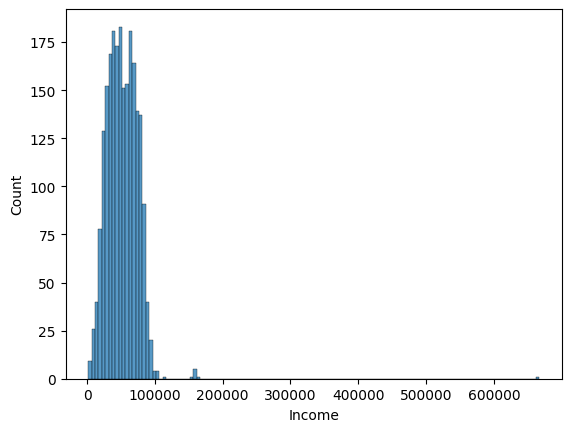

In [22]:
sns.histplot(
    data = df["Income"]
)

plt.show()

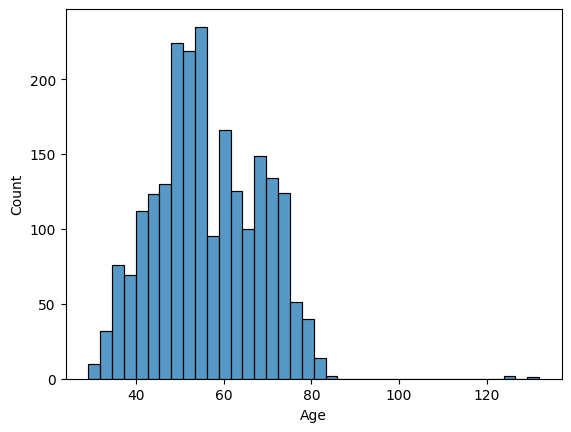

In [23]:
sns.histplot(
    data = df["Age"]
)

plt.show()

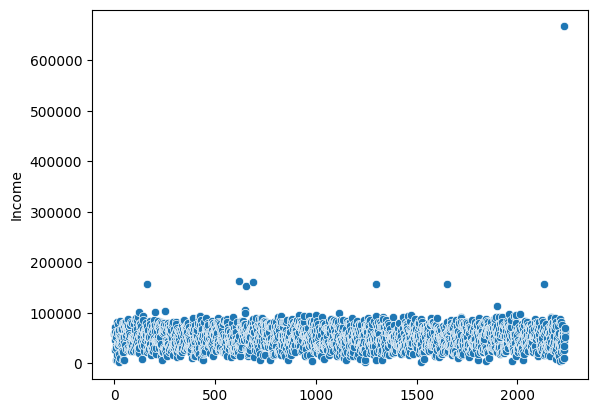

In [24]:
sns.scatterplot(
    data = df["Income"]
)

plt.show()

Dari analisis chart yang sudah dibuat, dapat terlihat adanya beberapa Outlier yang ada didalam data. maka langkah yang harus dilakukan adalah memproses outlier tersebut dari data yang diolah.

In [25]:
valid_mask = (
    (df['Income'] < 120000) &        
    (df['Age'] >= 18) &              
    (df['Age'] <= 100)               
)

df = df[valid_mask].copy()

In [26]:
df.count()

ID                      2222
Year_Birth              2222
Education               2222
Marital_Status          2222
Income                  2222
Kidhome                 2222
Teenhome                2222
Dt_Customer             2222
Recency                 2222
MntWines                2222
MntFruits               2222
MntMeatProducts         2222
MntFishProducts         2222
MntSweetProducts        2222
MntGoldProds            2222
NumDealsPurchases       2222
NumWebPurchases         2222
NumCatalogPurchases     2222
NumStorePurchases       2222
NumWebVisitsMonth       2222
AcceptedCmp3            2222
AcceptedCmp4            2222
AcceptedCmp5            2222
AcceptedCmp1            2222
AcceptedCmp2            2222
Complain                2222
Response                2222
Age                     2222
Customer_Since_Years    2222
Children                2222
Total_Spent             2222
dtype: int64

Setelah membersihkan outlier dari data, data akan dieksport ke excel untuk diolah lebih lanjut di tableau.

In [27]:
df.to_excel("Cleaned_Customers.xlsx", index=False)

In [28]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Since_Years,Children,Total_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,1,68,13,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,71,11,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,60,12,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,41,11,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,44,11,1,422


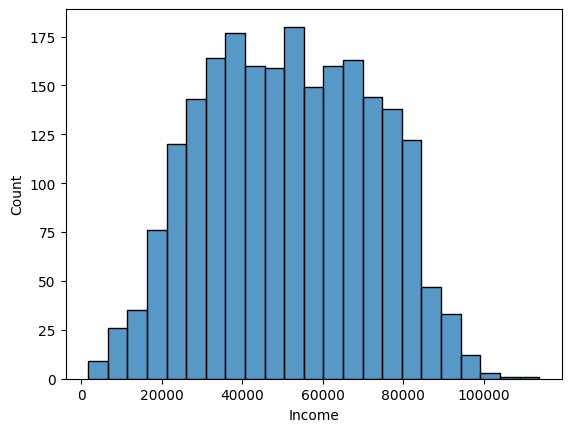

In [29]:
sns.histplot(
    data = df["Income"]
)

plt.show()

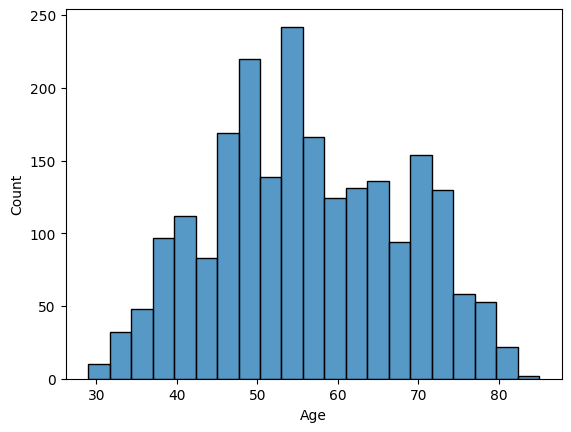

In [30]:
sns.histplot(
    data = df["Age"]
)

plt.show()

Setelah data sudah bersih, maka proses selanjutnya yang dilakukan adalah melakukan analisis deskriptif.

In [31]:
df["Income"].describe()

count      2222.000000
mean      51614.272277
std       20615.942812
min        1730.000000
25%       35395.000000
50%       51381.500000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

In [32]:
df["Age"].describe()

count    2222.000000
mean       56.126013
std        11.701694
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        85.000000
Name: Age, dtype: float64

In [33]:

descriptive_stats = df.describe(include='all').transpose()

numerical_cols = ['Income', 'Age']
inferential_stats = {}

for col in numerical_cols:
    data = df[col].dropna()
    mean = data.mean()
    sem = stats.sem(data)
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    inferential_stats[col] = {
        'mean': mean,
        'std_dev': data.std(),
        '95% CI Lower': ci[0],
        '95% CI Upper': ci[1]
    }

inferential_stats_df = pd.DataFrame(inferential_stats).transpose()

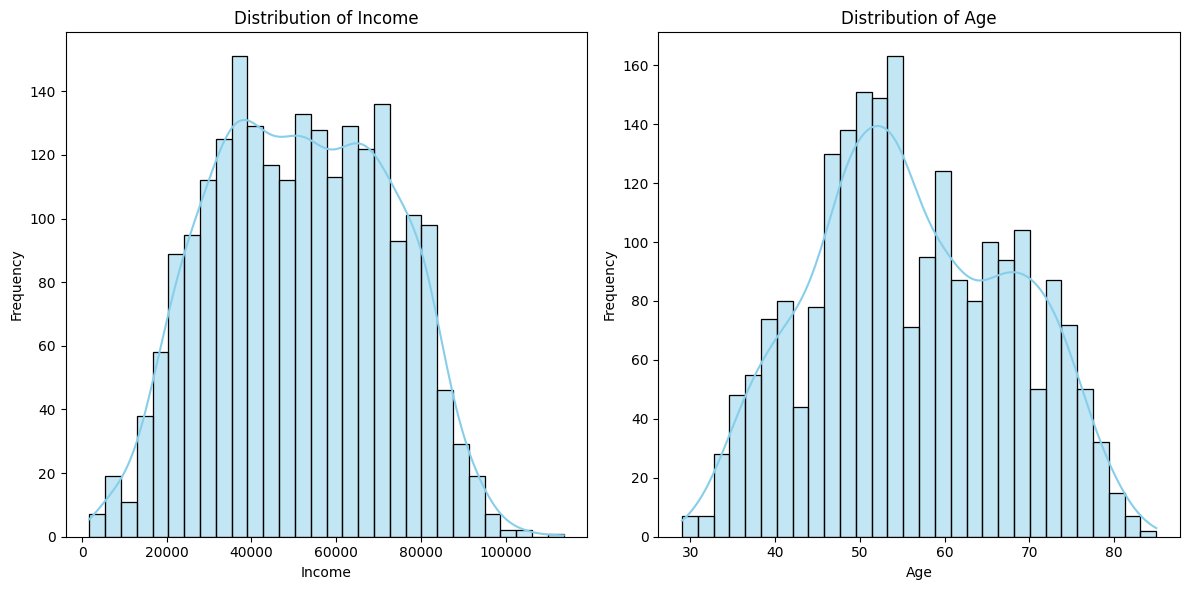

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [35]:
income_data = df['Income']
income_mean = income_data.mean()
income_median = income_data.median()
income_std = income_data.std()

income_sem = stats.sem(income_data) 
income_ci = stats.t.interval(0.95, len(income_data)-1, loc=income_mean, scale=income_sem)


print(f"Mean: {income_mean}")
print(f"Median: {income_median}")
print(f"Standard Deviation: {income_std}")
print(f"Standard Error: {income_sem}")
print(f"95% Confidence Interval: {income_ci}")

Mean: 51614.27227722772
Median: 51381.5
Standard Deviation: 20615.94281196566
Standard Error: 437.35205703641776
95% Confidence Interval: (50756.61060663037, 52471.93394782507)


In [36]:
age_data = df['Age']
age_mean = age_data.mean()
age_median = age_data.median()
age_std = age_data.std()

age_sem = stats.sem(age_data) 
age_ci = stats.t.interval(0.95, len(age_data)-1, loc=age_mean, scale=age_sem)


print(f"Mean: {age_mean}")
print(f"Median: {age_median}")
print(f"Standard Deviation: {age_std}")
print(f"Standard Error: {age_sem}")
print(f"95% Confidence Interval: {age_ci}")

Mean: 56.12601260126013
Median: 55.0
Standard Deviation: 11.70169362574417
Standard Error: 0.24824281987524618
95% Confidence Interval: (55.63920032226753, 56.61282488025273)


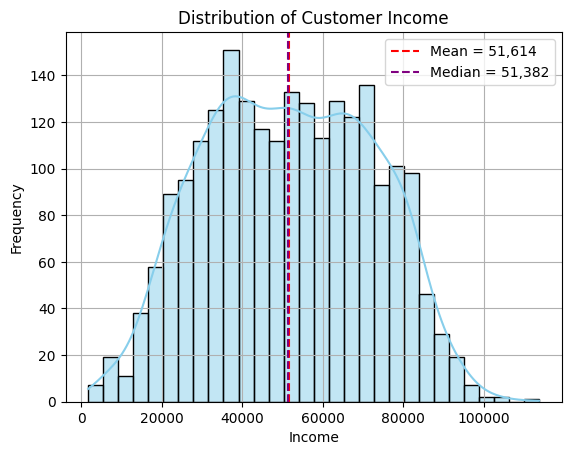

In [37]:
sns.histplot(df['Income'], kde=True, bins=30, color='skyblue')
plt.axvline(income_mean, color='red', linestyle='--', label=f"Mean = {income_mean:,.0f}")
plt.axvline(income_median, color='purple', linestyle='--', label=f"Median = {income_median:,.0f}")
plt.title('Distribution of Customer Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Graph dari data income menunjukkan bahwa mean dan median tidak berada di posisi yang sama, hal ini menunjukkan bahwa data "Income" itu skewed atau tidak berdistribusi normal.

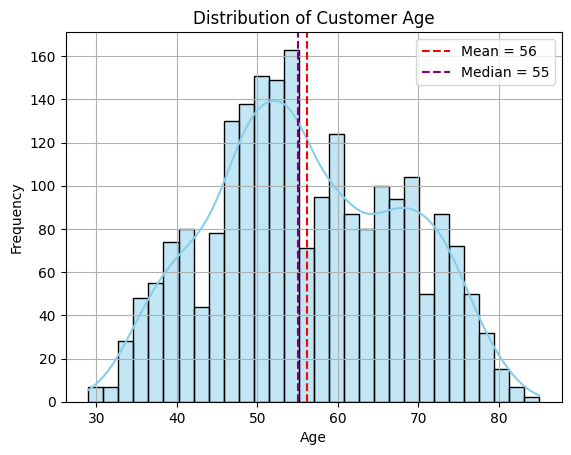

In [38]:
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.axvline(age_mean, color='red', linestyle='--', label=f"Mean = {age_mean:,.0f}")
plt.axvline(age_median, color='purple', linestyle='--', label=f"Median = {age_median:,.0f}")
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Graph dari data "Age" menunjukkan bahwa mean dan median tidak berada di posisi yang sama, hal ini menunjukkan bahwa data "Age" itu skewed atau tidak berdistribusi normal.